# Name : Monika Bhakuni 
# Company : The Sparks Foundation
#                GRIP July, 21 

# TSF GRIP TASK :                                               Task  6- Prediction using Decision Tree Algorithm
# About :
   -Create a decision tree classifier and visualize it graphically .
   

-The purpose is if we  fed any ner data to this classifier ,it would ne able to predict the rigt class accordingly

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as ans

In [2]:
# import data
data= pd.read_csv("iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


GATHERING INSIGHTS OF THE DATA 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#Droping the id column 
data=data.drop(['Id'],axis =1)
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shuffling the data 
data=data.sample(frac =1)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
17,5.1,3.5,1.4,0.3,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa
125,7.2,3.2,6.0,1.8,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualizing Data

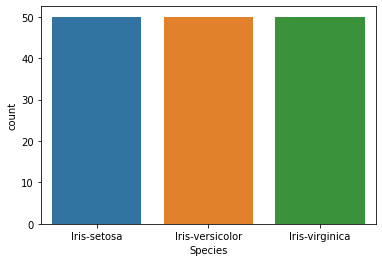

In [8]:
ans.countplot(x='Species',data=data)
plt.show()

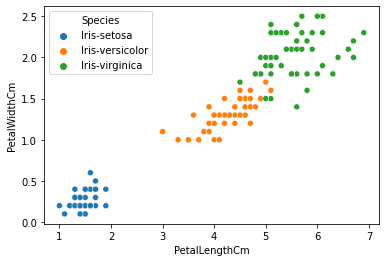

In [9]:
ans.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data,hue='Species')
plt.show()

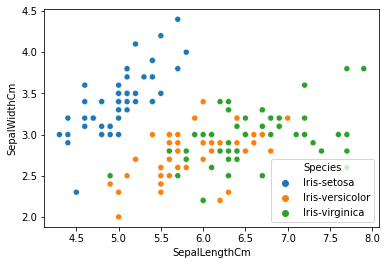

In [10]:
ans.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,hue='Species')
plt.show()

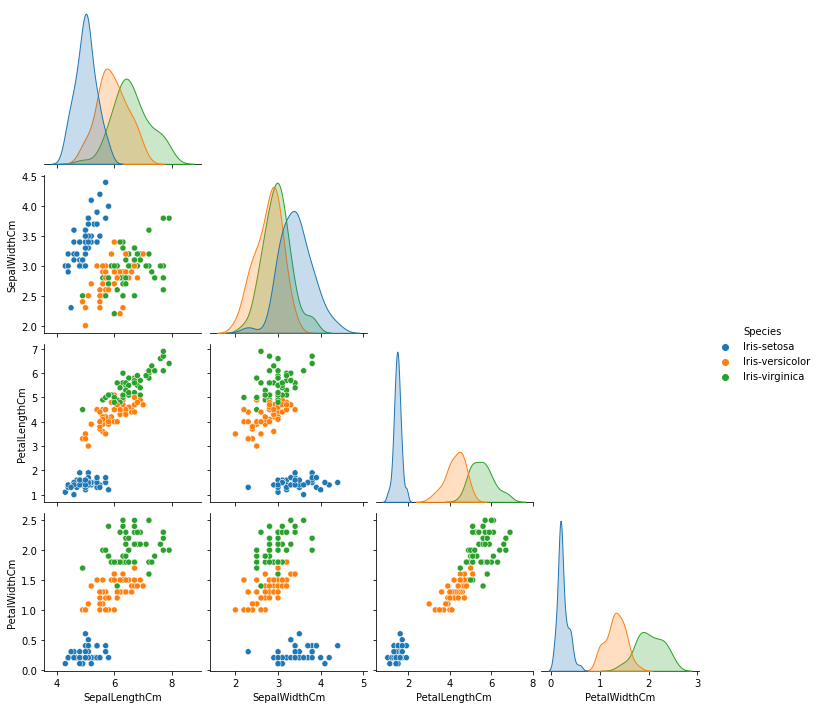

In [11]:
ans.pairplot(data,corner=True ,hue='Species',diag_kind='kde')
plt.show()

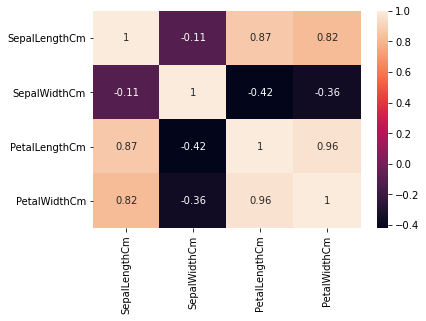

In [12]:
ans.heatmap(data.corr(),annot=True)
plt.show()


In [13]:
#seperate the x feature and y features
x=data.iloc[:,:-1]
x
y=data.iloc[:,-1]
y

17         Iris-setosa
58     Iris-versicolor
123     Iris-virginica
82     Iris-versicolor
13         Iris-setosa
            ...       
118     Iris-virginica
41         Iris-setosa
140     Iris-virginica
143     Iris-virginica
53     Iris-versicolor
Name: Species, Length: 150, dtype: object

In [14]:
#change the values from string to int type by lable encoder 
from sklearn.preprocessing import LabelEncoder 
labE= LabelEncoder()
y=labE.fit_transform(y)
y


array([0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0,
       2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1])

# Through lable encoder weve conveted out data into lalels where - 
 


# 0 : Iris-Setosa 


# 1 : Iris-Versicolor


# 2 : Iris-Verginica 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test,Y_train ,Y_test =train_test_split(x,y,train_size =0.8,random_state =31)

In [17]:
# leaning the shape of test and training sets
print("shape of x", X_train.shape)
print("shape of y", Y_train.shape)
print("shape of x", X_test.shape)
print("shape of y", X_test.shape)

shape of x (120, 4)
shape of y (120,)
shape of x (30, 4)
shape of y (30, 4)


In [18]:
#build ml model
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(max_depth=50)
dtc.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=50)

In [19]:
#accuracy of training set 
dtc.score(X_train,Y_train)

1.0

In [20]:
#prediction of the species 
y_pred =  dtc.predict(X_test)
y_pred 

array([2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 2, 2, 2, 0, 2, 1, 1])

In [21]:
#comparing the values
df=pd. DataFrame({'Actual value ':Y_test,'Predicted Values':y_pred})
df.head(10)


,Actual value,Predicted Values
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
5,1,1
6,0,0
7,1,1
8,0,0
9,2,2


In [22]:
#for the accuracy we use confusion matri
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]


1.0

In [23]:
#performing a model test
testtrail=np.array([[5.1,3.3,1.7,0.5]]) 
pred_testtrail= dtc.predict(testtrail)
pred_testtrail

array([0])

In [24]:
from sklearn import tree

In [25]:
f_n=["SepalLength","SepalWidth","PetalLength","PetalWidth"]

In [26]:
c_n= ["setosa","versicolor","verginica"]

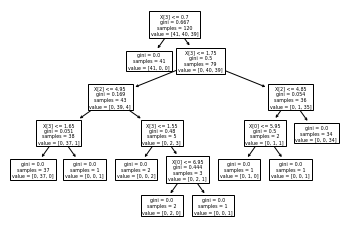

In [27]:
tree.plot_tree(dtc);

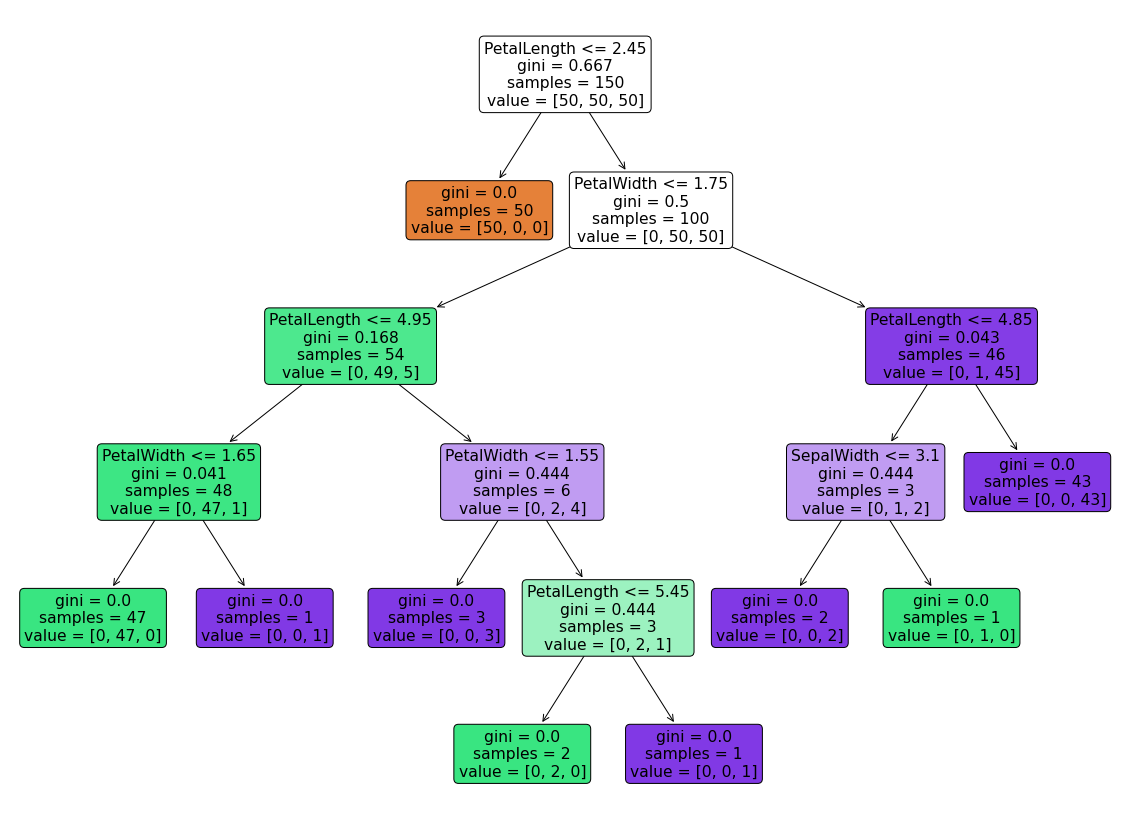

In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(x,y)
plt.figure(figsize= (20,15))
tree= tree.plot_tree(model,feature_names= f_n,rounded = True,  filled= True);
plt.show()
